# Sparse Probabilistic Count Matrix Factorization

In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '../')
import utils, cavi_spcmf, cavi_new
import plot_utils

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from scipy.stats import gamma

import operator

plt.style.use('ggplot')

In [2]:
# Experiment parameters
N = 1000 # number of observations
P = 20 # observation space dimensionality
K = 10 # latent space dimensionality
C = 2 # number of clusters

# Generate data set
z_p = 0.3
eps = 5.
Y, D, X, R, V, U, clusters = utils.generate_sparse_data(N, P, K, C=C, zero_prob=z_p, noisy_prop=0.,
                                                 eps_U=eps, return_all=True)

Y_train, Y_test, U_train, U_test, c_train, c_test = train_test_split(Y, U.T, clusters, test_size=0.2, random_state=42)

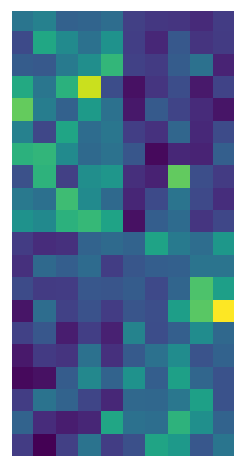

In [3]:
plt.matshow(V)
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
T = 60.
S = 1.

In [54]:
# # Run PCA
# pca_U = PCA(n_components=2).fit_transform(Y_train)

# Run CAVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
print('PCMF:')
inf = cavi_new.CoordinateAscentVI(Y_train, alpha, beta, pi_D)
pcmf_ll = inf.run_cavi(n_iterations=4000, empirical_bayes=True, return_ll=True, sampling_rate=S, max_time=T)
pcmf_U = inf.a[0] / inf.a[1] # VI estimate is the mean of the variational approximation
pcmf_U = PCA(n_components=2).fit_transform(pcmf_U)

PCMF:


KeyboardInterrupt: 

In [56]:
np.sum(inf.r[:, 0, 0] * self.X[0, 0])

9336.562529558241

In [57]:
# Run CAVI and get estimates (Sparse pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi_D = np.ones((P,)) * 0.5
pi_S = np.ones((P,)) * 0.5
print('PCMF sparse:')
inf = cavi_spcmf.CoordinateAscentVI(Y_train, alpha, beta, pi_D, pi_S)
spcmf_ll = inf.run_cavi(n_iterations=4000, empirical_bayes=True, return_ll=True, sampling_rate=S, max_time=T)
spcmf_U = inf.a[0] / inf.a[1] # VI estimate is the mean of the variational approximation
spcmf_U = PCA(n_components=2).fit_transform(spcmf_U)

PCMF sparse:


NameError: name 'exit' is not defined

In [61]:
np.sum(inf.r[:, 0, 0] * self.X[0, 0] * (ar[:, k] + br[j, k]))

24727.08253630316

In [7]:
from scipy.special import digamma

In [8]:
self = inf

In [41]:
omega = np.zeros((self.N,))
sum_k = np.sum(np.exp(ar[:, :] - br[j, :]), axis=1)
omega[sum_k > -]

In [45]:
(np.exp(ar[:, :] - br[j, :])).shape

(800, 10)

In [37]:
ar = digamma(self.a[0]) - np.log(self.a[1]) # NxK
br = digamma(self.b[0]) - np.log(self.b[1]) # PxK

logit_p = np.zeros((self.P, self.K))
for j in range(self.P):
    for k in range(self.K):
        if np.sum(np.exp(ar[:, k] - br[j, k])) > 0:
            omega = self.r[:, j, k]
        logit_p[j, k] = self.logit_pi_S[j, k] + np.sum(-self.p_D[:, j] * self.a[0, :, k]/self.a[1, :, k] * self.b[0, j, k]/self.b[1, j, k] +
            self.p_D[:, j] * omega * self.X[:, j] * (ar[:, k] + br[j, k]))

In [38]:
logit_p

array([[38637.94572832, 10267.14930646, 13056.07913491, 18631.52143849,
        23483.04393404, 22809.15328045, 12164.81317804, 15121.90039405,
        14814.65154504, 12533.86777555],
       [27508.27245852, 32380.15769982, 11385.8919353 ,  8529.6778535 ,
        33282.81758686, 31863.82770092, 10315.86335995,  6580.00581073,
        37226.38436362, 23742.3552985 ],
       [10761.77021575, 42513.87140486, 22387.17477778, 41546.97619118,
        16494.88705533,  4695.53110024, 15998.56481186, 46940.00829853,
        22313.72668144, 24706.13960503],
       [18860.98311675, 26213.73025941, 42305.61006429, 20427.91915252,
        25614.32105143, 23708.49971946, 17416.97908778, 10685.65853055,
        52600.92104689, 25170.02753182],
       [35867.33308595, 11634.02347985, 34372.78228677, 19540.72801321,
        22708.58983102, 22777.66476073, 47703.59833654, 12796.18958535,
         4784.09780101, 28616.27604354],
       [10746.54302918, 14056.33126781, 39187.72527896, 10644.37762392,
   

In [ ]:
inf.p_S

In [ ]:
est_V = inf.estimate_V(inf.b)
plt.matshow(est_V)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
plt.plot(spcmf_ll[1], label='SPCMF')
plt.plot(pcmf_ll[1], label='PCMF')
plt.ylabel('Average log-likelihood')
plt.xlabel('Seconds')
plt.title('Data set with N={} and P={}'.format(N, P))
plt.legend()
plt.show()

In [ ]:
U_list = [U_train, pcmf_U, spcmf_U, pca_U]
title_list = ['True $\mathbf{U}$', 'PCMF', 'SPCMF', 'PCA']

n_results = len(U_list)

assert len(U_list) == len(title_list)

fig = plt.figure(figsize=(16, 4))

s = 30
alpha = 0.7
labels=None
for i in range(len(U_list)):
    ax = plt.subplot(1, n_results, i+1)
    handlers = []
    for c in range(C):
        h = ax.scatter(U_list[i][c_train==c, 0], U_list[i][c_train==c, 1], s=s, alpha=alpha)
        handlers.append(h)
    if labels is not None:
        ax.legend(handlers, labels, scatterpoints=1)
    plt.title(title_list[i])
plt.show()

In [ ]:
true_silh = silhouette_score(U_train, c_train)
pcmf_silh = silhouette_score(pcmf_U, c_train)
spcmf_silh = silhouette_score(spcmf_U, c_train)
# hpcmf_silh = silhouette_score(hpcmf_U, c_train)
# shpcmf_silh = silhouette_score(shpcmf_U, c_train)
pca_silh = silhouette_score(pca_U, c_train)

# scores = {'SPCMF': spcmf_silh, 'PCMF': pcmf_silh, 'PCA': pca_silh, 'HPCMF': hpcmf_silh, 'SHPCMF': shpcmf_silh}
scores = {'SPCMF': spcmf_silh, 'PCMF': pcmf_silh, 'PCA': pca_silh}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Silhouette scores (higher is better):')
print('\033[1m- {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
for score_tp in sorted_scores[1:]:
    print('- {0}: {1:.3}'.format(score_tp[0], score_tp[1]))
    
print('\nSilhouette of true U:')
print('%0.3f' % true_silh)